In [45]:
import os
import time
import sys
import mlrose_hiive as mlrose
from random import randint
from random import seed
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:/Users/xpj/Desktop/OMSCS/CS7641/HW/HW2')

In [46]:
#set problem size
#change max_attempt
#change max_iteration
#assess time

# Create list of city coordinates
coords_list = []
seed(2022)
for i in range(0,100):
    x = randint(1,101)
    y = randint(1,101)
    coords_list.append((x,y))
# print(coords_list)
schedule = mlrose.ExpDecay()

# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

# Define optimization problem object
problem = mlrose.TSPOpt(length = 100, fitness_fn = fitness_coords, maximize=False)

#MINIMIZE IS BEST!

In [47]:
#XXXXXXX
#change max_attempt

#GA is the best
max_iter = 100
array = ["time_array","fit_array"]
meth = ["_rhc","_ga","_sa","_mimic"]
for m in meth:
    for a in array:
        globals()[a + m]=[]

attempt = range(5,21,5)
for max_attempt in attempt:
    print(max_attempt)
    start = time.time()
    _, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts = max_attempt, 
                                                        max_iters = max_iter,restarts=2 )
    end = time.time()
    time_rhc = end - start
    time_array_rhc.append(time_rhc)
    fit_array_rhc.append(best_fitness_rhc)
    
    start = time.time()
    _, best_fitness_ga,_ = mlrose.genetic_alg(problem, random_state = 2,
                                              max_attempts=max_attempt, max_iters = max_iter, 
                                              mutation_prob = 0.2)
    end = time.time()
    time_ga = end - start
    time_array_ga.append(time_ga)
    fit_array_ga.append(best_fitness_ga)

    
    start = time.time()
    _, best_fitness_sa,_ = mlrose.simulated_annealing(problem, schedule = schedule,
                                                              max_attempts = max_attempt, max_iters = max_iter,
                                                              random_state = 2)
    end = time.time()
    time_sa = end - start
    time_array_sa.append(time_sa)
    fit_array_sa.append(best_fitness_sa)

    
    start = time.time()
    _, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size = 500, 
                                              max_attempts = max_attempt, max_iters = max_iter)
    end = time.time()
    time_mimic = end - start
    time_array_mimic.append(time_mimic)
    fit_array_mimic.append(best_fitness_mimic)

    
    print(best_fitness_rhc, best_fitness_ga, best_fitness_sa, best_fitness_mimic)

5
5333.514965133158 2711.506178327821 4500.112210245133 4589.367034039514
10
4227.732491250606 2711.506178327821 4254.163984210693 4612.9007165551075
15
4283.896254819077 2711.506178327821 4153.6558819355205 4794.569385224304
20
4329.311120907779 2711.506178327821 4153.6558819355205 4794.569385224304


In [120]:
#change iter
array2 = ["time_array2","fit_array2"]
for m in meth:
    for a in array2:
        globals()[a + m]=[]
        
iter = range(50,600,50)
max_attempt = 10
schedule = mlrose.ExpDecay()

for max_iter in iter:
    print(max_iter)
    start = time.time()
    _, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts = max_attempt, 
                                                        max_iters = max_iter )
    end = time.time()
    time_rhc = end - start
    time_array2_rhc.append(time_rhc)
    fit_array2_rhc.append(best_fitness_rhc)
    
    start = time.time()
    _, best_fitness_ga,_ = mlrose.genetic_alg(problem, random_state = 2,max_iters = max_iter,
                                                max_attempts=max_attempt,mutation_prob = 0.4,pop_size=300)
    end = time.time()
    time_ga = end - start
    time_array2_ga.append(time_ga)
    fit_array2_ga.append(best_fitness_ga)

    
    start = time.time()
    _, best_fitness_sa,_ = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempt, max_iters = max_iter,random_state = 2)
    end = time.time()
    time_sa = end - start
    time_array2_sa.append(time_sa)
    fit_array2_sa.append(best_fitness_sa)

    
    start = time.time()
    _, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size = 200, 
                                              max_attempts = max_attempt, max_iters = max_iter)
    end = time.time()
    time_mimic = end - start
    time_array2_mimic.append(time_mimic)
    fit_array2_mimic.append(best_fitness_mimic)

    
    print(best_fitness_rhc, best_fitness_ga, best_fitness_sa, best_fitness_mimic)
    

50
4470.129040568944 3632.528381064269 4500.112210245133 4538.0073911246745
100
4303.321176691162 2909.8622316620763 4254.163984210693 4697.177235729277
150
4532.231071608831 2539.6789313536437 4254.163984210693 4697.177235729277
200
4532.231071608831 2194.286970042679 4254.163984210693 4697.177235729277
250
4532.231071608831 2022.3289753501726 4254.163984210693 4697.177235729277
300
4532.231071608831 1886.6362143894753 4254.163984210693 4697.177235729277
350
4532.231071608831 1734.5744207753469 4254.163984210693 4697.177235729277
400
4532.231071608831 1667.5453022637776 4254.163984210693 4697.177235729277
450
4532.231071608831 1659.762765122206 4254.163984210693 4697.177235729277
500
4532.231071608831 1659.762765122206 4254.163984210693 4697.177235729277
550
4532.231071608831 1659.762765122206 4254.163984210693 4697.177235729277


In [58]:
#fitness based on parameters
array3 = "fit_array3"
for m in meth:
    globals()[array3 + m]=[]

#RHC
restarts = range(0,20)
for r in restarts:
    _, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts = 10, 
                                                        max_iters = 1000, restarts = r )
    fit_array3_rhc.append(best_fitness_rhc)
print(fit_array3_rhc)

[4644.923433940582, 4049.907097885119, 3739.120933831261, 3956.5358648455767, 3816.8685509363104, 3647.186664742471, 3864.712498049565, 3723.9347521021346, 3661.6726021886093, 3727.0290440238737, 3838.640110634053, 3665.55978290027, 3937.6012565975752, 3671.3990190671557, 3530.841425810174, 3652.058532258385, 3559.101338407189, 3738.6867754226587, 3536.7049170963937, 3599.0199891392467]


In [67]:
#GA
mutation = [0.1,0.4]
pop = [100,200,300]
iter = range(50,550,50)
fit_ga_df = np.zeros((6,10))


j = 0

for m in mutation:
    for p in pop:
        i = 0
        for max_iter in iter:
            _, best_fitness_ga,_ = mlrose.genetic_alg(problem, random_state = 2,
                                                  max_attempts=10, mutation_prob = m,
                                                  pop_size = p,max_iters = max_iter )
            fit_ga_df[j][i] = best_fitness_ga
            i = i+1
            print(i)
        j = j + 1
print(fit_ga_df)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
[[3490.93904984 2820.1352059  2514.47050514 2373.09000693 2321.12069864
  2321.12069864 2321.12069864 2321.12069864 2321.12069864 2321.12069864]
 [3562.84747866 3186.29025728 2713.26330877 2463.25577784 2285.7505917
  2069.13982598 1942.57514056 1786.54962387 1717.13628142 1717.13628142]
 [3389.42154506 2789.19585356 2535.7107718  2346.1020162  2226.01564031
  2217.245544   2217.245544   2217.245544   2217.245544   2217.245544  ]
 [3414.45479102 2938.04872106 2938.04872106 2938.04872106 2938.04872106
  2938.04872106 2938.04872106 2938.04872106 2938.04872106 2938.04872106]
 [3278.85218469 2924.98284763 2578.5131111  2228.01553026 2122.28974705
  2005.21097989 1894.13847971 1870.31725043 1870.31725043 1870.31725043]
 [3632.52838106 2909.86223166 2539.67893135 2194.28697004 2022.32897535
  1886.63621439 1734.57442078 1667.54530226 1659.76276512 1659.76276512]]


In [81]:
fit_ga_df = [[3490.93904984, 2820.1352059,  2514.47050514, 2373.09000693, 2321.12069864,
  2321.12069864, 2321.12069864, 2321.12069864, 2321.12069864, 2321.12069864],
 [3562.84747866, 3186.29025728, 2713.26330877, 2463.25577784, 2285.7505917,
  2069.13982598, 1942.57514056, 1786.54962387, 1717.13628142, 1717.13628142],
 [3389.42154506, 2789.19585356, 2535.7107718,  2346.1020162,  2226.01564031,
  2217.245544,   2217.245544,   2217.245544,   2217.245544,   2217.245544  ],
 [3414.45479102, 2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106,
  2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106],
 [3278.85218469, 2924.98284763, 2578.5131111,  2228.01553026, 2122.28974705,
  2005.21097989, 1894.13847971, 1870.31725043, 1870.31725043, 1870.31725043],
 [3632.52838106, 2909.86223166, 2539.67893135, 2194.28697004, 2022.32897535,
  1886.63621439, 1734.57442078, 1667.54530226, 1659.76276512, 1659.76276512]]

print(fit_ga_df)

[[3490.93904984, 2820.1352059, 2514.47050514, 2373.09000693, 2321.12069864, 2321.12069864, 2321.12069864, 2321.12069864, 2321.12069864, 2321.12069864], [3562.84747866, 3186.29025728, 2713.26330877, 2463.25577784, 2285.7505917, 2069.13982598, 1942.57514056, 1786.54962387, 1717.13628142, 1717.13628142], [3389.42154506, 2789.19585356, 2535.7107718, 2346.1020162, 2226.01564031, 2217.245544, 2217.245544, 2217.245544, 2217.245544, 2217.245544], [3414.45479102, 2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106, 2938.04872106], [3278.85218469, 2924.98284763, 2578.5131111, 2228.01553026, 2122.28974705, 2005.21097989, 1894.13847971, 1870.31725043, 1870.31725043, 1870.31725043], [3632.52838106, 2909.86223166, 2539.67893135, 2194.28697004, 2022.32897535, 1886.63621439, 1734.57442078, 1667.54530226, 1659.76276512, 1659.76276512]]


In [75]:
#SA
schedule1 = mlrose.ExpDecay()
schedule2 = mlrose.GeomDecay()
schedule3 = mlrose.ArithDecay()

schedule = [schedule1,schedule2,schedule3]
fit_array_sa_all = np.zeros((3,10))
iter = range(50,550,50)

j = 0
for s in schedule:
    i = 0
    for max_iter in iter:
        _, best_fitness_sa,_ = mlrose.simulated_annealing(problem, schedule = s,
                                                          max_attempts = 10, 
                                                          max_iters = max_iter,
                                                          random_state = 2)
        fit_array_sa_all[j][i] = best_fitness_sa
        i = i + 1
    j = j+1
        

print(fit_array_sa_all)

[[4500.11221025 4254.16398421 4254.16398421 4254.16398421 4254.16398421
  4254.16398421 4254.16398421 4254.16398421 4254.16398421 4254.16398421]
 [4500.11221025 4254.16398421 4254.16398421 4254.16398421 4254.16398421
  4254.16398421 4254.16398421 4254.16398421 4254.16398421 4254.16398421]
 [4500.11221025 4254.16398421 4254.16398421 4254.16398421 4254.16398421
  4254.16398421 4254.16398421 4254.16398421 4254.16398421 4254.16398421]]


In [86]:
#MIMIC
pop = range(100,550,100)
# iter = range(100,600,100)
problem.set_mimic_fast_mode(True)
for p in pop:
#     for max_iter in iter:
    _, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size = p, 
                                                      max_attempts = 10, 
                                                      max_iters = 300)
    fit_array3_mimic.append(best_fitness_mimic)
print(fit_array3_mimic)

[4765.801842248945, 4691.380105986487, 4721.746158282256, 4660.588326457986, 4461.856888030237]


In [104]:
print(fit_array_sa_all)

[[4500.11221025 4254.16398421 4254.16398421 4254.16398421 4254.16398421
  4254.16398421 4254.16398421 4254.16398421 4254.16398421 4254.16398421]
 [4500.11221025 4254.16398421 4254.16398421 4254.16398421 4254.16398421
  4254.16398421 4254.16398421 4254.16398421 4254.16398421 4254.16398421]
 [4500.11221025 4254.16398421 4254.16398421 4254.16398421 4254.16398421
  4254.16398421 4254.16398421 4254.16398421 4254.16398421 4254.16398421]]


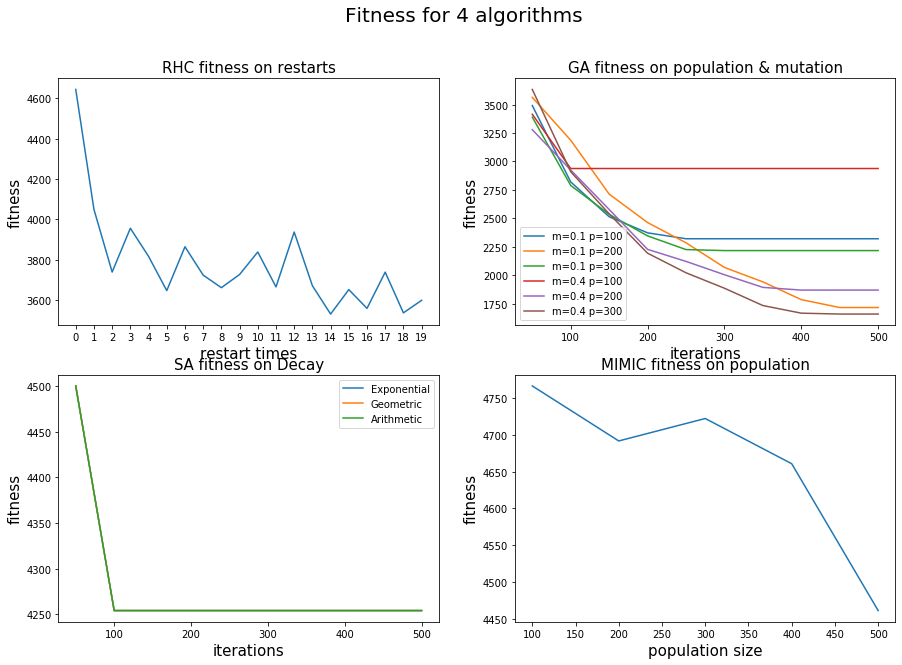

In [108]:
#pic for 4 parameters
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('Fitness for 4 algorithms',fontsize=20)

ax1.plot(fit_array3_rhc)
ax1.set_xlabel("restart times",fontsize=15)
ax1.set_ylabel("fitness",fontsize=15)
ax1.set_title("RHC fitness on restarts",fontsize = 15)
ax1.set_xticks(range(0,20))

fit_ga_df = np.asarray(fit_ga_df)
ax2.plot(iter,fit_ga_df.T)
ax2.set_xlabel("iterations",fontsize=15)
ax2.set_ylabel("fitness",fontsize=15)
ax2.set_title("GA fitness on population & mutation",fontsize = 15)
legend_names = []
mutation = [0.1,0.4]
pop = [100,200,300]
for m in mutation:
    for p in pop:
        l = "m="+str(m)+" p="+str(p)
        legend_names.append(l)
ax2.legend(legend_names,loc='lower left')

iter = range(50,550,50)
ax3.plot(iter,fit_array_sa_all.T)
ax3.set_xlabel("iterations",fontsize=15)
ax3.set_ylabel("fitness",fontsize=15)
ax3.set_title("SA fitness on Decay",fontsize = 15)
ax3.legend(["Exponential","Geometric","Arithmetic"],loc='upper right')

pop = range(100,550,100)
ax4.plot(pop,fit_array3_mimic)
ax4.set_xlabel("population size",fontsize=15)
ax4.set_ylabel("fitness",fontsize=15)
ax4.set_title("MIMIC fitness on population",fontsize = 15)

fig.savefig("TSP-parameters")


[741.8433599472046, 856.1838366985321, 678.621520280838, 671.4520664215088, 1019.1931834220886, 890.6438136100769, 684.2957396507263, 750, 852.9459881782532, 810.7562527656555, 853.009218454361]


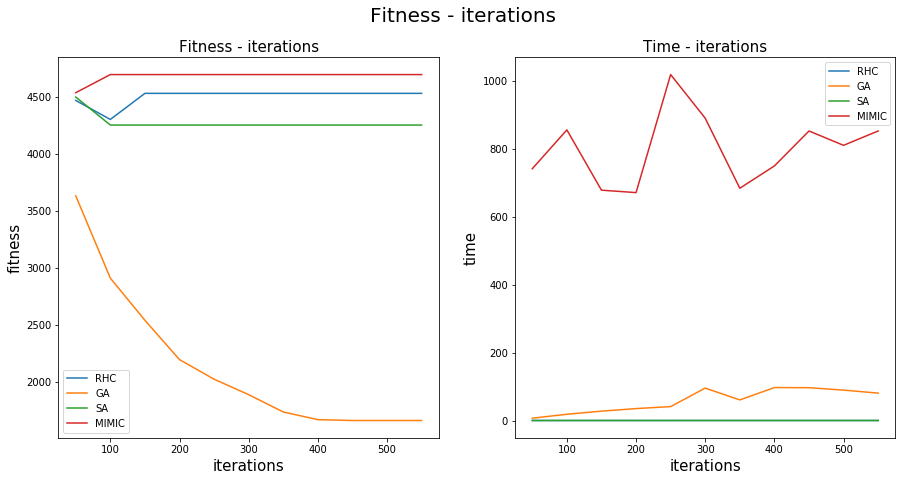

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle('Fitness - iterations',fontsize=20)

ax1.plot(iter,fit_array2_rhc)
ax1.plot(iter,fit_array2_ga)
ax1.plot(iter,fit_array2_sa)
ax1.plot(iter,fit_array2_mimic)
ax1.set_xlabel("iterations",fontsize=15)
ax1.set_ylabel("fitness",fontsize=15)
ax1.legend(["RHC","GA","SA","MIMIC"])
ax1.set_title("Fitness - iterations",fontsize=15)

ax2.plot(iter,time_array2_rhc)
ax2.plot(iter,time_array2_ga)
ax2.plot(iter,time_array2_sa)
time_array2_mimic2 = time_array2_mimic
time_array2_mimic2[7] = 750
ax2.plot(iter,time_array2_mimic)
ax2.set_xlabel("iterations",fontsize=15)
ax2.set_ylabel("time",fontsize=15)
ax2.legend(["RHC","GA","SA","MIMIC"])
ax2.set_title("Time - iterations",fontsize=15)

print(time_array2_mimic)